In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
import plotly.express as px
import numpy as np

# 1 - Tratando os dados

In [31]:
df_expectativa_vida = pd.read_csv('./dataset/expectativa_vida.csv', sep=',')

# Selecionando somente as colunas importantes para a análise dos dados
df_expectativa_vida  = df_expectativa_vida[['Indicator','ParentLocation','Country', 'Period', 'Dim1', 'Value']]

# Renomeando a coluna período para ano
df_expectativa_vida.rename(columns={'Period': 'Year'}, inplace=True)

In [32]:
# Separando os dados com base no indicador - Expectativa de vida ao nascer
df_expectativa_ao_nascer = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at birth (years)']

# Selecionando somente os dados para ambos os sexos
df_expectativa_ao_nascer= df_expectativa_ao_nascer[df_expectativa_ao_nascer['Dim1'] == 'Both sexes']

df_expectativa_ao_nascer.head()

,Indicator,ParentLocation,Country,Year,Dim1,Value
2,Life expectancy at birth (years),Africa,Lesotho,2019,Both sexes,50.75
3,Life expectancy at birth (years),Africa,Central African Republic,2019,Both sexes,53.10
10,Life expectancy at birth (years),Eastern Mediterranean,Somalia,2019,Both sexes,56.47
13,Life expectancy at birth (years),Africa,Eswatini,2019,Both sexes,57.73
15,Life expectancy at birth (years),Africa,Mozambique,2019,Both sexes,58.14


In [33]:
# Separando os dados com base no indicador - Expectativa de vida aos 60 anos
df_expectativa_aos_60 = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at age 60 (years)']

# Selecionando somente os dados para ambos os sexos
df_expectativa_aos_60 = df_expectativa_aos_60[df_expectativa_aos_60['Dim1'] == 'Both sexes']

df_expectativa_aos_60.head()

,Indicator,ParentLocation,Country,Year,Dim1,Value
553,Life expectancy at age 60 (years),Africa,Central African Republic,2019,Both sexes,13.17
556,Life expectancy at age 60 (years),Africa,Lesotho,2019,Both sexes,13.43
558,Life expectancy at age 60 (years),Western Pacific,Kiribati,2019,Both sexes,13.69
564,Life expectancy at age 60 (years),Eastern Mediterranean,Somalia,2019,Both sexes,14.54
568,Life expectancy at age 60 (years),Western Pacific,Micronesia (Federated States of),2019,Both sexes,14.70


In [34]:
df_expectativa_ao_nascer['Year'] = df_expectativa_ao_nascer['Year'].astype(str)

### Coeficinete de Gini

In [35]:
# Carregar o DataFrame a partir do arquivo CSV
df_gini = pd.read_csv('./dataset/economic-inequality-gini-index.csv')

df_gini


,Entity,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390
2,Albania,ALB,2005,0.305957
3,Albania,ALB,2008,0.299847
4,Albania,ALB,2012,0.289605
...,...,...,...,...
2120,Zambia,ZMB,2010,0.556215
2121,Zambia,ZMB,2015,0.571361
2122,Zimbabwe,ZWE,2011,0.431536
2123,Zimbabwe,ZWE,2017,0.443371


In [36]:
# Renomeando coluna Entity para Country
df_gini.rename(columns={'Entity': 'Country'}, inplace=True)

df_gini = df_gini[["Country", "Year", "Gini coefficient"]]

In [37]:
df_gini = df_gini.copy()
df_gini['Year'] = df_gini['Year'].astype(str) 

In [38]:
# Juntando tabela de expectativa de vida com Coeficiente de Gini por meio do ano e país
df_gini_merged = pd.merge(df_expectativa_ao_nascer, df_gini, on=['Year', 'Country'], how="inner")

df_gini_merged

,Indicator,ParentLocation,Country,Year,Dim1,Value,Gini coefficient
0,Life expectancy at birth (years),Western Pacific,Kiribati,2019,Both sexes,59.42,0.278327
1,Life expectancy at birth (years),Africa,Zimbabwe,2019,Both sexes,60.68,0.502564
2,Life expectancy at birth (years),Western Pacific,Vanuatu,2019,Both sexes,65.31,0.323176
3,Life expectancy at birth (years),Africa,Malawi,2019,Both sexes,65.62,0.385432
4,Life expectancy at birth (years),Africa,Uganda,2019,Both sexes,66.69,0.427055
...,...,...,...,...,...,...,...
244,Life expectancy at birth (years),Europe,Spain,2000,Both sexes,79.08,0.342510
245,Life expectancy at birth (years),Americas,Canada,2000,Both sexes,79.10,0.333439
246,Life expectancy at birth (years),Europe,Italy,2000,Both sexes,79.36,0.352528
247,Life expectancy at birth (years),Europe,Sweden,2000,Both sexes,79.57,0.272364


In [39]:
mean_gini_by_country = df_gini.groupby('Country')['Gini coefficient'].mean().reset_index()

mean_gini_by_country.rename(columns={'Gini coefficient': 'Mean Gini Coefficient'}, inplace=True)

mean_gini_by_country

,Country,Mean Gini Coefficient
0,Albania,0.312141
1,Algeria,0.343802
2,Angola,0.486482
3,Argentina - urban,0.458159
4,Armenia,0.324759
...,...,...
178,Venezuela,0.480091
179,Vietnam,0.360825
180,Yemen,0.354791
181,Zambia,0.527016


### PIB - Novo

In [40]:
df_pib = pd.read_csv('./dataset/GDP by Country 1999-2022.csv')

df_pib = df_pib[["Country", "2000", "2010", "2015", "2019"]]

df_pib

,Country,2000,2010,2015,2019
0,"Afghanistan, Rep. of.",0,15.406,0,0
1,Albania,3.695,11.797,11.591,15.553
2,Algeria,54.749,154.843,175.077,210.906
3,Angola,9.135,87.718,102.011,119.403
4,Antigua and Barbuda,0.678,1.196,1.285,1.536
...,...,...,...,...,...
175,Venezuela,117.153,379.16,131.855,170.41
176,Vietnam,31.196,102.906,198.805,265.987
177,"Yemen, Republic of",9.561,31.98,0,0
178,Zambia,3.238,15.792,24.466,32.957


In [41]:
df_pib_melted = df_pib.melt(id_vars=["Country"], var_name="Year", value_name="PIB")

df_pib_melted

,Country,Year,PIB
0,"Afghanistan, Rep. of.",2000,0
1,Albania,2000,3.695
2,Algeria,2000,54.749
3,Angola,2000,9.135
4,Antigua and Barbuda,2000,0.678
...,...,...,...
715,Venezuela,2019,170.41
716,Vietnam,2019,265.987
717,"Yemen, Republic of",2019,0
718,Zambia,2019,32.957


In [42]:
# Convertendo coluna de Year para string
df_pib_melted['Year'] = df_pib_melted['Year'].astype(str)

# Preenchedo "," dos valores de PIB's para evitar que ocorra erro na hora da conversão para numérico 
df_pib_melted['PIB'] = df_pib_melted['PIB'].str.replace(',', '')
df_pib_melted['PIB'] = pd.to_numeric(df_pib_melted['PIB'], errors='coerce')

In [43]:
# Fazendo o merge dos DadaFrames
df_pib_merged = pd.merge(df_expectativa_ao_nascer, df_pib_melted, on=['Country', 'Year'], how='inner')

df_pib_merged

,Indicator,ParentLocation,Country,Year,Dim1,Value,PIB
0,Life expectancy at birth (years),Africa,Lesotho,2019,Both sexes,50.75,2.538
1,Life expectancy at birth (years),Africa,Central African Republic,2019,Both sexes,53.10,2.637
2,Life expectancy at birth (years),Africa,Mozambique,2019,Both sexes,58.14,26.495
3,Life expectancy at birth (years),Western Pacific,Kiribati,2019,Both sexes,59.42,0.175
4,Life expectancy at birth (years),Africa,Chad,2019,Both sexes,59.63,17.440
...,...,...,...,...,...,...,...
587,Life expectancy at birth (years),Europe,Sweden,2000,Both sexes,79.57,242.792
588,Life expectancy at birth (years),Western Pacific,Australia,2000,Both sexes,79.69,390.017
589,Life expectancy at birth (years),Europe,Iceland,2000,Both sexes,79.70,8.678
590,Life expectancy at birth (years),Europe,Switzerland,2000,Both sexes,79.72,246.322


Calculando a média dos pibs dos países

In [44]:
mean_pib_by_country = df_pib_melted.groupby('Country')['PIB'].mean().reset_index()

mean_pib_by_country.rename(columns={'PIB': 'Mean PIB'}, inplace=True)

mean_pib_by_country

,Country,Mean PIB
0,"Afghanistan, Rep. of.",3.85150
1,Albania,10.65900
2,Algeria,148.89375
3,Angola,79.56675
4,Antigua and Barbuda,1.17375
...,...,...
175,Venezuela,199.64450
176,Vietnam,149.72350
177,"Yemen, Republic of",10.38525
178,Zambia,19.11325


## Visualização inicial dos dados

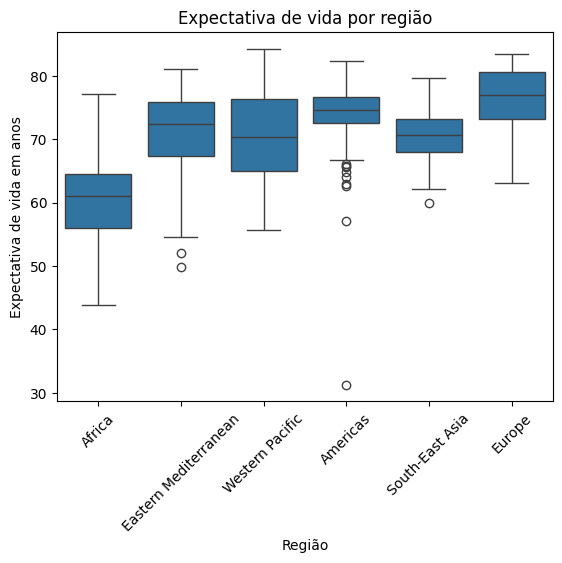

In [45]:
sns.boxplot(x='ParentLocation', y='Value', data=df_expectativa_ao_nascer)
plt.title('Expectativa de vida por região')
plt.xlabel('Região')
plt.ylabel('Expectativa de vida em anos')
plt.xticks(rotation=45)  # This helps if the region names are long and overlap
plt.show()

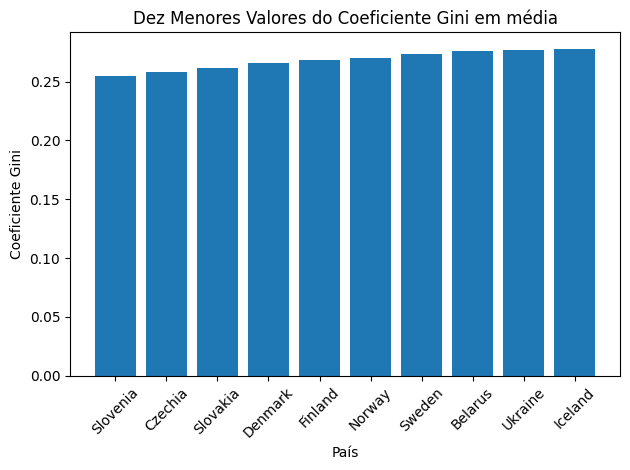

In [56]:
# df_gini_2019 = df_gini.query("Year == '2019'")

df_gini_ordenado = mean_gini_by_country.sort_values(by='Mean Gini Coefficient').reset_index().drop(columns="index", axis=1)

cinco_menores_valores = df_gini_ordenado.head(10)

plt.bar(cinco_menores_valores['Country'], cinco_menores_valores['Mean Gini Coefficient'])
plt.xlabel('País')
plt.ylabel('Coeficiente Gini')
plt.title('Dez Menores Valores do Coeficiente Gini em média')

# Rotacionar os rótulos do eixo x para facilitar a leitura (opcional)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

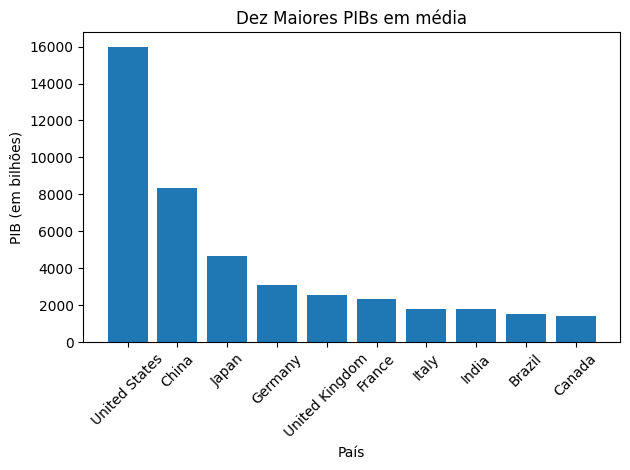

In [57]:
df_pib_ordenado = mean_pib_by_country.sort_values(by='Mean PIB', ascending=False)

# df_pib_ordenado = df_pib_ordenado.query("Year == '2019'")

dez_maiores_pibs = df_pib_ordenado.head(10)

dez_maiores_pibs

plt.bar(dez_maiores_pibs['Country'], dez_maiores_pibs['Mean PIB'])
plt.xlabel('País')
plt.ylabel('PIB (em bilhões)')
plt.title('Dez Maiores PIBs em média')

# Rotacionar os rótulos do eixo x para facilitar a leitura (opcional)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [48]:
df_gini_merged.describe()

,Value,Gini coefficient
count,249.000000,249.000000
mean,74.382369,0.364306
std,6.945328,0.086261
min,47.050000,0.232323
25%,71.150000,0.299505
50%,75.870000,0.339957
75%,79.720000,0.410664
max,83.220000,0.633832


In [49]:
df_pib_merged.describe()

,Value,PIB
count,592.000000,592.000000
mean,70.454797,272.994042
std,8.804686,1000.181560
min,31.280000,0.000000
25%,64.572500,5.873250
50%,72.275000,24.355500
75%,76.727500,160.464750
max,84.260000,15620.710000


## Correlação entre os dados

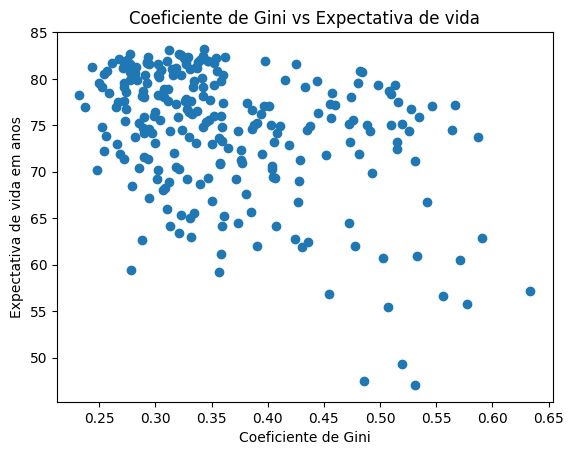

In [50]:
# Assuming df_merged is your merged dataframe
plt.scatter(df_gini_merged['Gini coefficient'], df_gini_merged['Value'])
plt.title('Coeficiente de Gini vs Expectativa de vida')
plt.xlabel('Coeficiente de Gini')
plt.ylabel('Expectativa de vida em anos')
plt.show()

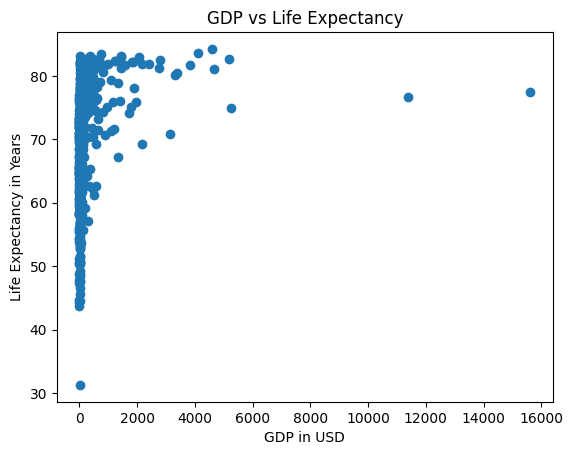

In [51]:
# Assuming df_merged is your merged dataframe
plt.scatter(df_pib_merged['PIB'], df_pib_merged['Value'])
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP in USD')
plt.ylabel('Life Expectancy in Years')
plt.show()

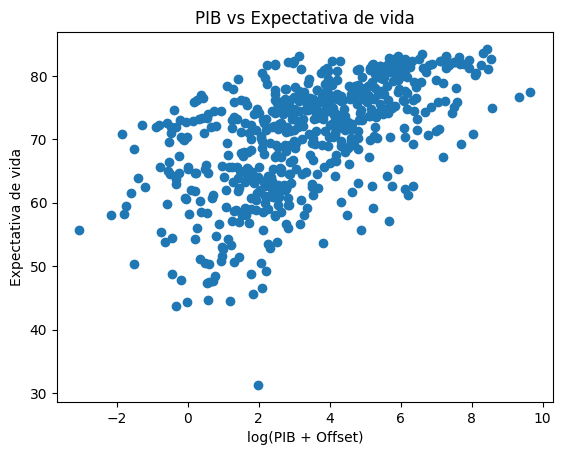

In [52]:
df_pib_merged_without_zero = df_pib_merged[df_pib_merged['PIB'] > 0]

plt.scatter(np.log(df_pib_merged_without_zero['PIB']), df_pib_merged_without_zero['Value'])
plt.title('PIB vs Expectativa de vida')
plt.xlabel('log(PIB + Offset)')
plt.ylabel('Expectativa de vida')
plt.show()

Expectativa de Vida Mediana: A linha dentro de cada caixa indica a expectativa de vida mediana para cada região. A Europa parece ter a expectativa de vida mediana mais alta, enquanto a África tem a mais baixa. Isso sugere que, em média, as pessoas na Europa vivem mais do que aquelas na África.

Intervalo Interquartil (IQR): O comprimento da caixa representa o IQR, que é o intervalo entre o primeiro quartil (percentil 25) e o terceiro quartil (percentil 75). Uma caixa mais longa indica uma maior disparidade dentro dos dados de expectativa de vida dessa região. O Pacífico Ocidental e a Europa mostram um IQR relativamente amplo, indicando mais variação na expectativa de vida dentro dessas regiões.

Outliers (Valores Atípicos): Os pontos fora dos 'bigodes' das caixas representam outliers. A África e as Américas têm outliers na extremidade inferior, indicando que há países nessas regiões com expectativas de vida significativamente mais baixas do que a média.

Dispersão e Distribuição: Os 'bigodes' que se estendem das caixas mostram o alcance dos dados excluindo outliers. As Américas e a Europa têm bigodes superiores longos, sugerindo que há países com expectativas de vida que se estendem bem além do percentil 75. Por outro lado, o bigode inferior da África indica que a região tem países com expectativas de vida estendendo-se abaixo do percentil 25.

Simetria: Se uma caixa é simétrica, isso sugere que os dados estão distribuídos de maneira uniforme ao redor da mediana. A caixa para o Mediterrâneo Oriental é bastante simétrica, sugerindo uma distribuição equilibrada ao redor da expectativa de vida mediana.

Comparação Entre Regiões: Há uma clara disparidade na expectativa de vida entre diferentes regiões. Por exemplo, a expectativa de vida na África é geralmente mais baixa do que em outras regiões, enquanto a Europa tem geralmente uma expectativa de vida mais alta.

Fatores de Saúde Pública e Socioeconômicos: As diferenças na expectativa de vida entre as regiões podem refletir vários fatores, como condições econômicas, acesso à saúde, estilo de vida e políticas de saúde pública.

Implicações Políticas: Tal visualização poderia ser usada por formuladores de políticas para identificar regiões que precisam de intervenções de saúde e para fazer benchmarking com regiões de maior expectativa de vida.

É importante notar que, embora os boxplots sejam úteis para visualizar a distribuição dos dados, eles não fornecem informações sobre as causas subjacentes das diferenças. Análises mais detalhadas seriam necessárias para entender os fatores que contribuem para a variação na expectativa de vida entre essas regiões.


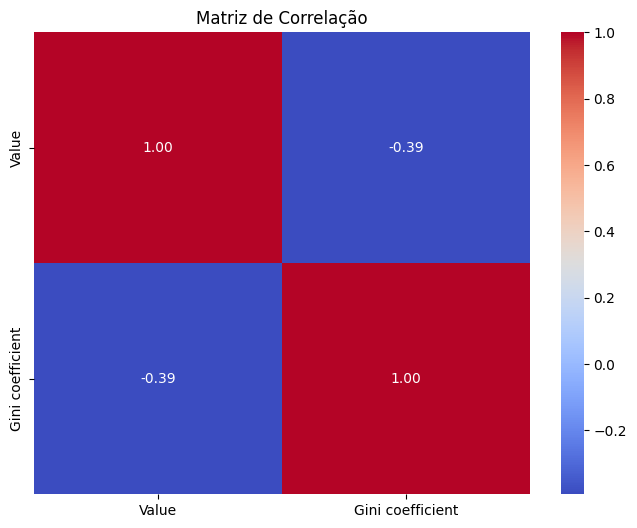

In [53]:
gini_matriz = df_gini_merged

matriz_correlacao = gini_matriz.corr(numeric_only=True)

plt.figure(figsize=(8, 6))

# Plotar a matriz de correlação usando heatmap
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")

# Adicionar título ao gráfico
plt.title('Matriz de Correlação')

# Exibir o gráfico
plt.show()

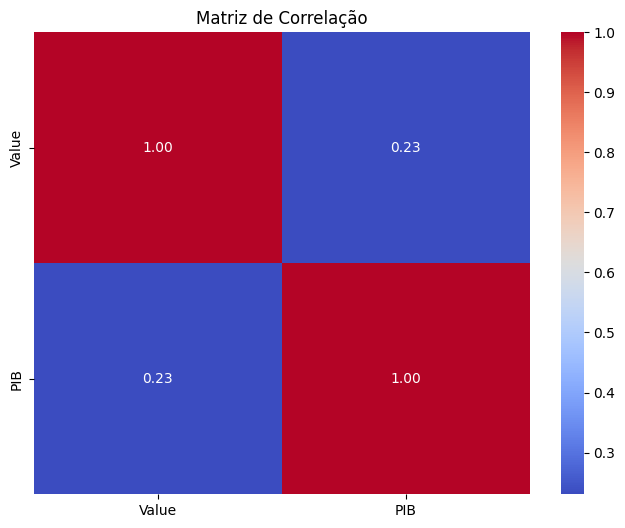

In [54]:
colunas_strings = df_pib_merged.select_dtypes(include=['object'])

nomes_colunas_strings = colunas_strings.columns.tolist()

df_matriz = df_pib_merged.drop(columns=nomes_colunas_strings)

df_matriz = df_pib_merged.corr(numeric_only=True)

plt.figure(figsize=(8, 6))

sns.heatmap(df_matriz, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matriz de Correlação')

plt.show()

# Realizar teste de hipótese

Para realizar o teste de hipótese, devemos definir a hipótese nula e a hipótese alternativa, como mostrado abaixo:

Hipótese Nula (H0): Não há relação entre o coeficiente de Gini e o PIB com a expectativa de vida.

Hipótese Alternativa (H1): Existe uma relação entre o coeficiente de Gini e o PIB com a expectativa de vida.

In [55]:
t_stat_life_exp, p_value_life_exp = stats.ttest_1samp(pib_merge['LifeExp_2019'], pib_merge['LifeExp_2019'].mean())

# Realizando um teste t de Student para PIB em 2019
t_stat_pib, p_value_pib = stats.ttest_1samp(pib_merge['PIB_2019'], pib_merge['PIB_2019'].mean())

# Imprimindo o resultado do teste de hipótese para expectativa de vida
print("Resultado do Teste de Hipótese para Expectativa de Vida (2019):")
print("Estatística t para Expectativa de Vida:", t_stat_life_exp)
print("Valor p para Expectativa de Vida:", p_value_life_exp)

# Imprimindo o resultado do teste de hipótese para PIB
print("\nResultado do Teste de Hipótese para PIB (2019):")
print("Estatística t para PIB:", t_stat_pib)
print("Valor p para PIB:", p_value_pib) 

# Calculando o intervalo de confiança para expectativa de vida em 2019
confidence_interval_life_exp = stats.t.interval(0.95, len(pib_merge['LifeExp_2019']) - 1, loc=pib_merge['LifeExp_2019'].mean(), scale=stats.sem(pib_merge['LifeExp_2019']))

# Calculando o intervalo de confiança para PIB em 2019
confidence_interval_pib = stats.t.interval(0.95, len(pib_merge['PIB_2019']) - 1, loc=pib_merge['PIB_2019'].mean(), scale=stats.sem(pib_merge['PIB_2019']))

# Imprimindo o intervalo de confiança para expectativa de vida
print("\nIntervalo de Confiança para Expectativa de Vida (95%):", confidence_interval_life_exp)

# Imprimindo o intervalo de confiança para PIB
print("Intervalo de Confiança para PIB (95%):", confidence_interval_pib)

NameError: name 'pib_merge' is not defined